In [59]:
#!pip3 install opencv-python
import random
import pickle
import os
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

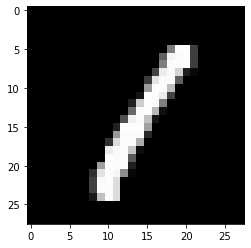

In [2]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import cv2
import numpy as np

(x_train,y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[3], cmap="gray")

In [3]:
x_train[0].shape

(28, 28)

In [4]:
28*28

784

In [5]:
# x_train = x_train/255.0
# x_test = x_test/255.0

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
encoder_input = keras.Input (shape= (28,28,1), name= "img")
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(32, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name= "encoder")

hidden_layer = keras.layers.Dense(16, activation="relu")(encoder_output)
# hidden_layer_output = keras.layers.Dense(784, activation="relu")
# hidden_layer = keras.Model(hidden_layer_input, hidden_layer_output , name="hidden_layer")

decoder_input = keras.layers.Dense(784, activation="relu")(hidden_layer)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)
opt = keras.optimizers.Adam (lr=0.001, decay = 1e-6)
autoencoder = keras.Model (encoder_input, decoder_output, name= "autoencoder")
autoencoder.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 784)               13328     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                            

2022-11-17 19:05:36.959095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-17 19:05:36.959362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/hardik/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
autoencoder.compile(opt, loss="mse")
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3


2022-11-17 19:05:37.179388: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-17 19:05:37.339332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1684/1688 [============================>.] - ETA: 0s - loss: 2393.6565

2022-11-17 19:05:47.619099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 11s 6ms/step - loss: 2393.0469 - val_loss: 1971.5919
Epoch 2/3
1688/1688 [==============================] - 10s 6ms/step - loss: 1950.9203 - val_loss: 1907.5216
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 1913.1654 - val_loss: 1899.4263


In [9]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

2022-11-17 19:06:08.010975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [10]:
print(example)

[   0.       546.30176  637.74023    0.       628.991    805.67786
  443.94766  156.15804  868.3154   260.28308  393.05902  337.0929
  887.03644  334.7601   505.70673    0.      1338.1532   581.9275
    0.       271.69913  528.8934     0.       430.80988  255.79988
  783.9202   382.0118     0.       771.71356  219.5886   726.20123
  775.65686  194.6299 ]


In [11]:
example.shape

(32,)

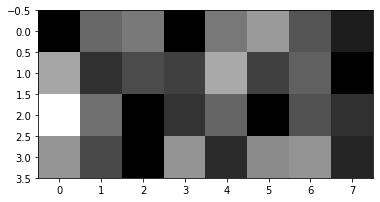

In [12]:
plt.imshow(example.reshape(4,8), cmap="gray")

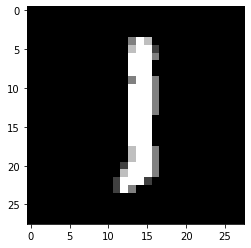

In [13]:
ex = x_test[14]
# noise = np.random.normal(0.5,0.3,20)
# ex.add
plt.imshow(ex,cmap="gray")

2022-11-17 19:06:08.241757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


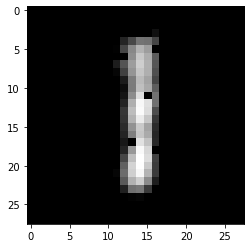

In [14]:
ae_out = autoencoder.predict([ex.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out,cmap="gray")

In [15]:
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 255)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

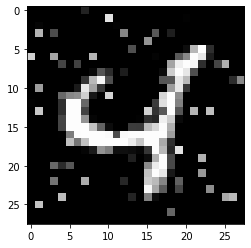

In [16]:
noisy = add_noise(x_test[67])
plt.imshow(noisy, cmap="gray")

2022-11-17 19:06:08.441269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


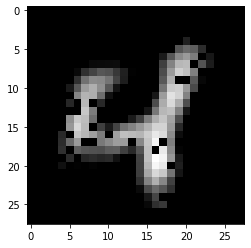

In [17]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out,cmap="gray")

In [18]:
weights, biases = autoencoder.layers[2].get_weights()
print(weights.shape, biases.shape)

(784, 32) (32,)


In [19]:
print(weights)


[[-0.00127967  0.04661632 -0.04956835 ...  0.08075614 -0.03320397
   0.08415095]
 [-0.06678194  0.00191462  0.04571938 ... -0.02642508 -0.05661709
   0.03782292]
 [-0.05634083 -0.0735705  -0.05054928 ...  0.07001621  0.02333633
  -0.0390196 ]
 ...
 [-0.05845789 -0.07061245 -0.06631093 ... -0.06152274  0.08455706
  -0.01674094]
 [ 0.03451715 -0.02592855  0.06212515 ...  0.07147243  0.08250322
  -0.0031487 ]
 [-0.03318212 -0.03898145  0.0570933  ...  0.07690842  0.00495128
   0.02309533]]


In [20]:
print(biases)

[ 0.6308768   0.28158894  0.73525316  0.4310176  -0.1408232   0.13684376
  0.4747599   0.21070474  0.5633768  -0.5790546   0.4326151  -0.23505937
 -0.3771807  -0.41073307 -0.29557306  0.18905625  0.19421864  0.20056538
  0.7315471  -0.33166116 -0.13457677 -0.02162733 -0.16083474  0.5633362
 -0.33719078 -0.21968679  0.6513162   0.01541756  0.71264386 -0.47257128
  0.2813933  -0.17833586]


In [21]:
for i in range (2,5):
  weights, biases = autoencoder.layers[i].get_weights()
  with open ("../data/model_weights.dat", "ab") as f:
    pickle.dump(weights,f)
  with open ("../data/model_biases.dat", "ab") as f:
    pickle.dump(biases,f)

In [22]:
autoencoder.save_weights("../data/saved_model")

In [23]:
autoencoder.save("../data/autoencoder_save")

INFO:tensorflow:Assets written to: ../data/autoencoder_save/assets


2022-11-17 19:06:08.751030: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [51]:
def representative_dataset():
  for data in tf.keras.datasets.mnist:
    yield {
      "image": data.image,
      "bias": data.bias,
    }
def representative_dataset():
  for data in tf.keras.datasets.mnist.from_tensor_slices((images)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]


In [56]:
model_name = "tflite_autoencoder_mnist"

In [60]:
converter = tf.lite.TFLiteConverter.from_saved_model("../data/autoencoder_save/")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.uint16]
# converter.target_spec.supported_types = [tf.uint8]
tflite_quant_model = converter.convert()
open(model_name, "wb").write(tflite_quant_model)
convert_bytes(get_file_size(model_name), "KB")

2022-11-17 20:11:19.249196: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-11-17 20:11:19.249207: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-11-17 20:11:19.249279: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: ../data/autoencoder_save/
2022-11-17 20:11:19.249995: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-11-17 20:11:19.250000: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: ../data/autoencoder_save/
2022-11-17 20:11:19.252036: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-11-17 20:11:19.280175: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: ../data/autoencoder_save/
2022-11-17 20:11:19.288719: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status

File size: 155.191 Kilobytes


In [47]:
# print(tflite_quant_model)
with open ("../data/tflite_autoencoder_mnist.tflite", "wb") as f:
  f.write(tflite_quant_model)

In [61]:
interpreter = tf.lite.Interpreter(model_path = model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28  1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 28 28  1]
Output Type: <class 'numpy.float32'>
